# Scrape Instagram posts

### Bibliotheken importeren

In [1]:
import os 
import json
import pprint

import requests as r
import pandas as pd  
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

from instascrape import Profile, scrape_posts

In [77]:
#alt.renderers.enable('notebook'); # for rendering in jupyter notebook

### Zetten van de session id

In [2]:
AUTOMATISCH_SESSION_ID = True

if AUTOMATISCH_SESSION_ID:
    url = 'https://e9cffa99695e.ngrok.io/maaktnietuit.txt'
    my_session_id = r.get(url).text
else:
    my_session_id = '589504420%3AeoEor46j6ioAP8%3A28'        

In [3]:
headers = {
    "user-agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Mobile Safari/537.36 Edg/87.0.664.57",
    "cookie": f"sessionid={my_session_id};"
}

In [4]:
lise = Profile('lisekerckhove')
lise.scrape(headers=headers)

In [5]:
lise_recent_posts = lise.get_recent_posts()
lise_recent_posts = lise.get_recent_posts()
lise_recent_posts

/Users/john/.pyenv/versions/3.7.4/envs/tajo_notebook/lib/python3.7/site-packages/instascrape/core/_static_scraper.py:136: MissingCookiesWarning: Request header does not contain cookies! It's recommended you pass at least a valid sessionid otherwise Instagram will likely redirect you to their login page.
  MissingCookiesWarning


[<Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>]

In [6]:
joe = Profile('joebiden')
joe.scrape()

In [7]:
joe_recent_posts = joe.get_recent_posts()
joe_recent_posts = joe.get_recent_posts()
joe_recent_posts

[<Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>]

In [8]:
print(joe)

<Profile>


In [9]:
joe_json = joe.json_dict

In [10]:
pprint.pprint(joe_json)

{'browser_push_pub_key': 'BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjFNkuTq9j4MPAVLvAFhXrUU1A9UxyxBA7YIOjqDIDHI',
 'bundle_variant': 'es6',
 'cache_schema_version': 3,
 'config': {'csrf_token': 'IP62FT9UU6jJcemEHBeYsqhIXJkrMCCL',
            'viewer': None,
            'viewerId': None},
 'connection_quality_rating': 'EXCELLENT',
 'consent_dialog_config': {'is_user_linked_to_fb': False,
                           'should_show_consent_dialog': True,
                           'use_logged_out_3p_consent_dialog': True},
 'country_code': 'BE',
 'deployment_stage': 'c2',
 'device_id': '227EA9CA-BBA4-4AA6-AA1E-312C3DCC0C8B',
 'encryption': {'key_id': '221',
                'public_key': 'f3fb91c7bf309d2ee7d9ff8c65995ee2b0ad1a3d62220f9b0cfd0755eaada94f',
                'version': '10'},
 'entry_data': {'ProfilePage': [{'always_show_message_button_to_pro_account': False,
                                 'graphql': {'user': {'biography': 'Husband to '
                                        

                                                                                                                               'buttons': [{'action': 3,
                                                                                                                                            'action_url': 'com.instagram.civic_engagement.voting_information_center.action',
                                                                                                                                            'button_type': 0,
                                                                                                                                            'has_chevron': True,
                                                                                                                                            'icon': {'icon_glyph': 0,
                                                                                                                                             

                                                                                                                                   {'config_height': 240,
                                                                                                                                    'config_width': 240,
                                                                                                                                    'src': 'https://scontent-bru2-1.cdninstagram.com/v/t51.2885-15/e35/c0.280.720.720a/s240x240/179464518_860765084652721_6691084531748105831_n.jpg?tp=1&_nc_ht=scontent-bru2-1.cdninstagram.com&_nc_cat=1&_nc_ohc=-eEZGrS5VjMAX-qI5Wp&edm=ABfd0MgBAAAA&ccb=7-4&oh=375d81415b5ca5d201ba90e3ea27b2c3&oe=6090D4E7&_nc_sid=7bff83'},
                                                                                                                                   {'config_height': 320,
                                                                                         

                                                                                                    'profile_pic_url': 'https://scontent-bru2-1.cdninstagram.com/v/t51.2885-19/s150x150/109136688_610125179899980_1868015297406610141_n.jpg?tp=1&_nc_ht=scontent-bru2-1.cdninstagram.com&_nc_ohc=bbCTiOAdcl8AX9720tv&edm=ABfd0MgBAAAA&ccb=7-4&oh=7a0d08a670e5f887d783e4258311e030&oe=60B41362&_nc_sid=7bff83',
                                                                                                    'username': 'kimkardashian'}},
                                                                                          {'node': {'full_name': 'Tom '
                                                                                                                 'Holland',
                                                                                                    'id': '176618189',
                                                                                                    'is_pri

In [11]:
posts_df = pd.DataFrame(post.to_dict() for post in joe_recent_posts)
posts_df[['id','display_url','upload_date', 'comments', 'likes']]

,id,display_url,upload_date,comments,likes
0,2564322047149153994,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-02 01:17:11,2775,301783
1,2564218014023339220,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-01 21:50:46,2490,109619
2,2564123798656089689,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-01 18:43:18,6108,646727
3,2563583800278217113,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-01 00:50:34,6495,376244
4,2562658577534016963,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-29 18:12:10,8980,526670
5,2561900194489154232,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-28 17:05:23,6226,573338
6,2560664303640733175,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-27 00:09:54,7904,229112
7,2559906011930779527,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-25 23:03:18,18746,915331
8,2559050188643997668,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-24 18:42:56,49239,190903
9,2558303675999348065,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-23 18:00:28,6097,128481


In [12]:
posts_df = pd.DataFrame(post.to_dict() for post in joe_recent_posts)
posts_df[['id','display_url','upload_date', 'comments', 'likes']]

,id,display_url,upload_date,comments,likes
0,2564322047149153994,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-02 01:17:11,2775,301783
1,2564218014023339220,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-01 21:50:46,2490,109619
2,2564123798656089689,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-01 18:43:18,6108,646727
3,2563583800278217113,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-05-01 00:50:34,6495,376244
4,2562658577534016963,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-29 18:12:10,8980,526670
5,2561900194489154232,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-28 17:05:23,6226,573338
6,2560664303640733175,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-27 00:09:54,7904,229112
7,2559906011930779527,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-25 23:03:18,18746,915331
8,2559050188643997668,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-24 18:42:56,49239,190903
9,2558303675999348065,https://scontent-bru2-1.cdninstagram.com/v/t51...,2021-04-23 18:00:28,6097,128481


In [13]:
billie = Profile('onbespreekbaar')
billie.scrape(headers=headers)
billie_posts = billie.get_recent_posts()
billie_posts = billie.get_recent_posts()

df_billie_posts = pd.DataFrame(post.to_dict() for post in billie_posts)
df_billie_posts['uur_van_de_dag'] = df_billie_posts.upload_date.map(lambda dt: dt.hour)
df_billie_posts[['id','display_url','upload_date', 'uur_van_de_dag', 'comments', 'likes']]

df_billie_posts_grouped = df_billie_posts.groupby('uur_van_de_dag').mean().reset_index()

/Users/john/.pyenv/versions/3.7.4/envs/tajo_notebook/lib/python3.7/site-packages/instascrape/core/_static_scraper.py:136: MissingCookiesWarning: Request header does not contain cookies! It's recommended you pass at least a valid sessionid otherwise Instagram will likely redirect you to their login page.
  MissingCookiesWarning


In [14]:
df_billie_posts_grouped[['uur_van_de_dag','likes']]

,uur_van_de_dag,likes
0,11,2529.500000
1,12,3456.250000
2,16,685.000000
3,18,2946.000000
4,19,1497.666667
5,20,668.000000


Text(0.5, 1.0, 'post op den dag')

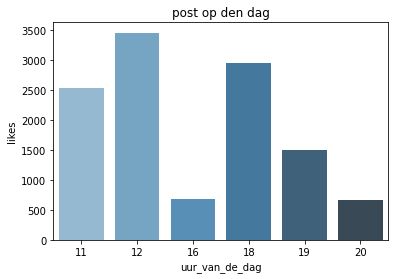

In [15]:
plot = sns.barplot(
    data=df_billie_posts_grouped,
    x='uur_van_de_dag',
    y='likes',
    palette='Blues_d')

plot.set_title('post op den dag')

In [34]:
plt.style.use('seaborn-darkgrid')

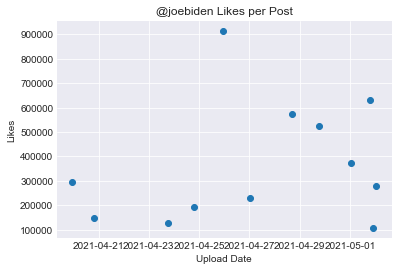

In [35]:
plt.scatter(posts_df.upload_date, posts_df.likes)  # Plot the data
plt.xlabel('Upload Date')              # Write labels
plt.ylabel('Likes')
plt.title('@joebiden Likes per Post')
plt.show()